In [79]:
import pandas as pd

# Načtení dat z CSV souboru
data = pd.read_csv('https://raw.githubusercontent.com/petrrozkosny/pydata/refs/heads/main/pydata_data.csv',sep=";")



In [80]:
data.head()
data.dtypes

STATION     object
NAME        object
DATE        object
PRCP       float64
SNWD       float64
TAVG       float64
TMAX       float64
TMIN       float64
dtype: object

In [81]:
data = data[["NAME","DATE","PRCP"]]
print(data.index.name)
data["DATE"] = pd.to_datetime(data["DATE"])
data = data.set_axis(data["DATE"])
data = data.drop("DATE",axis=1)




None


In [82]:
data_ruzyne_2000 = data.loc[(data.index.year==2000)&(data["NAME"]=="RUZYNE")]
data_ruzyne_2000
data_ruzyne_mosnov_2000 = data.loc[(data.index.year==2000)&(data["NAME"].isin(["MOSNOV","TURANY"])),"PRCP"]
data_ruzyne_mosnov_2000


DATE
2000-01-01     0.0
2000-01-02     0.8
2000-01-03     1.5
2000-01-04     0.0
2000-01-05     NaN
              ... 
2000-12-27     0.5
2000-12-28    14.0
2000-12-29     NaN
2000-12-30     8.1
2000-12-31     NaN
Name: PRCP, Length: 732, dtype: float64

In [83]:
data.loc[data["PRCP"]>0]["PRCP"]

DATE
2006-12-04    19.0
2006-12-06     2.2
2006-12-09     6.8
2006-12-10     1.0
2006-12-16     1.0
              ... 
2020-11-04     9.4
2020-11-05     0.3
2020-11-12     0.5
2020-11-13     0.3
2020-11-16     0.5
Name: PRCP, Length: 25172, dtype: float64

In [84]:

srazky2 = data.iloc[:,0]
len(data.columns)

2

In [85]:
import pandas as pd

# Načtení dat z CSV souboru
data = pd.read_csv('https://raw.githubusercontent.com/petrrozkosny/pydata/refs/heads/main/pydata_data.csv',sep=";")

data = data.set_index("DATE")
data = data.loc[~data.index.duplicated(keep="first")]
data = data.apply(lambda x: x.str.join(";"),axis=0)
data

AttributeError: Can only use .str accessor with string values!

In [ ]:
import pandas as pd

# Načtení dat z CSV souboru
data = pd.read_csv('https://raw.githubusercontent.com/petrrozkosny/pydata/refs/heads/main/pydata_data.csv',sep=";")
data = pd.read_w

# filtrovat na NAME == RUZYNE
# zmenit DATE na datum a čas
# dosadit date do indexu
# ziskat data za mesic 3 kdy srážky byly vyšší 0

data = data.loc[data["NAME"]=="RUZYNE"]
data["DATE"] = pd.to_datetime(data["DATE"])
data = data.set_index("DATE")
data = data.loc[(data.index.month==3)& (data["PRCP"]>0)]



STATION    NAME  PRCP  SNWD  TAVG  TMAX  TMIN
DATE                                                         
2000-03-01  EZM00011518  RUZYNE   1.3   NaN   6.2   9.7   NaN
2000-03-02  EZM00011518  RUZYNE   3.8   NaN   1.9   5.0   NaN
2000-03-03  EZM00011518  RUZYNE   1.5   NaN   4.1   7.6  -0.2
2000-03-04  EZM00011518  RUZYNE   3.6   NaN   1.4   3.8   NaN
2000-03-05  EZM00011518  RUZYNE   1.3  20.0  -0.6   2.1  -3.4
...                 ...     ...   ...   ...   ...   ...   ...
2020-03-13  EZM00011518  RUZYNE   0.3   NaN   6.3   NaN   NaN
2020-03-21  EZM00011518  RUZYNE   7.9   NaN   1.9   NaN   NaN
2020-03-22  EZM00011518  RUZYNE   2.0   NaN  -1.7   NaN  -5.1
2020-03-30  EZM00011518  RUZYNE   0.3   NaN  -0.1   NaN   NaN
2020-03-31  EZM00011518  RUZYNE   0.8   NaN  -0.3   NaN   NaN

[242 rows x 7 columns]

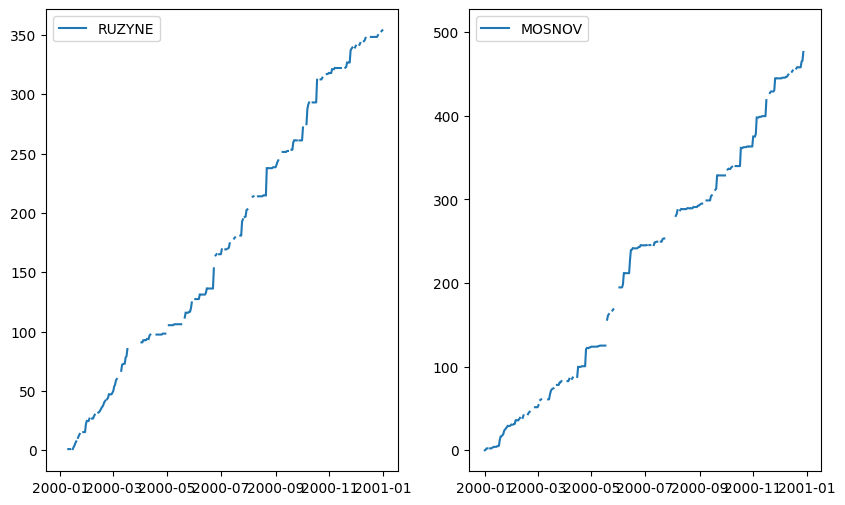

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt


# Načtení dat z CSV souboru
data = pd.read_csv(
    'https://raw.githubusercontent.com/petrrozkosny/pydata/refs/heads/main/pydata_data.csv',
    sep=";"
)

# Výběr relevantních dat
data = data.loc[data["NAME"].isin(["RUZYNE", "MOSNOV"]), ["DATE", "NAME", "PRCP"]]

# Nastavení datového indexu
data["DATE"] = pd.to_datetime(data["DATE"])
data = data.set_index("DATE")
data = data.sort_index()

# Filtrace a kumulace pro RUZYNE
srazky_ruzyne = data.loc[(data.index.year == 2000) & (data["NAME"] == "RUZYNE"), "PRCP"].cumsum()

# Filtrace a kumulace pro MOSNOV
srazky_mosnov = data.loc[(data.index.year == 2000) & (data["NAME"] == "MOSNOV"), "PRCP"].cumsum()

# Vykreslení
fig, ax = plt.subplots(1,2,figsize=(10, 6))
ax[0].plot(srazky_ruzyne.index, srazky_ruzyne, label="RUZYNE")
ax[1].plot(srazky_mosnov.index, srazky_mosnov, label="MOSNOV")
ax[0].legend()
ax[1].legend()

In [ ]:
import pandas as pd

# Načtení dat z CSV souboru
data = pd.read_csv('https://raw.githubusercontent.com/petrrozkosny/pydata/refs/heads/main/pydata_data.csv',sep=";")

data["DATE"] = pd.to_datetime(data["DATE"])
data["ROK"] = data["DATE"].dt.year
data.insert(0,"MESIC",data["DATE"].dt.month)

sloupce =  data.columns.to_list()[:-1]
sloupce.insert(0,"ROK")

data = data[sloupce]

data = data.assign(kvartal=data["DATE"].dt.quarter,den=data["DATE"].dt.day)

data = data.drop(["SNWD","STATION"],axis=1)
del data["TAVG"]

data2 =  data[["NAME","ROK"]]
data2 = data2.drop_duplicates()
data2 = data2.reset_index(drop=True)
data2.loc[189] = ["PRAHA",2025]

data["POLOLETI"] = data["MESIC"].apply(lambda x: "1. pololeti" if x <7 else "2.pololeti")

def zkontroluj_srazky(cislo):
    if pd.isna(cislo):
        return "nevyplneno"
    elif cislo == 0:
        return "neprselo"
    else:
        return "prselo"

data["TYP_SRAZEK"] = data["PRCP"].apply(zkontroluj_srazky)
data = data.drop(len(data)-1,axis=0)

data


ROK  MESIC    NAME       DATE  PRCP  TMAX  TMIN  kvartal  den  \
0      2006     12  PIDING 2006-12-01   0.0   4.2   1.0        4    1   
1      2006     12  PIDING 2006-12-02   0.0   1.8  -1.7        4    2   
2      2006     12  PIDING 2006-12-03   0.0   5.1  -4.6        4    3   
3      2006     12  PIDING 2006-12-04  19.0   8.3  -0.9        4    4   
4      2006     12  PIDING 2006-12-05   0.0  12.0   0.9        4    5   
...     ...    ...     ...        ...   ...   ...   ...      ...  ...   
67828  2020     11  TURANY 2020-11-13   0.3   NaN   4.5        4   13   
67829  2020     11  TURANY 2020-11-14   0.0   NaN   NaN        4   14   
67830  2020     11  TURANY 2020-11-15   0.0   NaN   5.7        4   15   
67831  2020     11  TURANY 2020-11-16   0.5   NaN   NaN        4   16   
67832  2020     11  TURANY 2020-11-17   0.0   NaN   1.7        4   17   

         POLOLETI TYP_SRAZEK  
0      2.pololeti   neprselo  
1      2.pololeti   neprselo  
2      2.pololeti   neprselo  
3      2.pololeti     prselo  
4      2.pololeti   neprselo  
...           ...        ...  
67828  2.pololeti     prselo  
67829  2.pololeti   neprselo  
67830  2.pololeti   neprselo  
67831  2.pololeti     prselo  
67832  2.pololeti   neprselo  

[67833 rows x 11 columns]

In [ ]:
import pandas as pd

# Načtení dat z CSV souboru
data = pd.read_csv('https://raw.githubusercontent.com/petrrozkosny/pydata/refs/heads/main/pydata_data.csv',sep=";")


# for i,r in data.iterrows():
#     # i = index
#     # r = řádek
#     srazky = r["PRCP"]
#     print(srazky)
#     if i > 3:
#         break


# for i in data.itertuples():
#     print(i)


for i,r in data.items():
    print(r)

0        GME00132274
1        GME00132274
2        GME00132274
3        GME00132274
4        GME00132274
            ...     
67829    EZM00011723
67830    EZM00011723
67831    EZM00011723
67832    EZM00011723
67833    EZM00011723
Name: STATION, Length: 67834, dtype: object
0        PIDING
1        PIDING
2        PIDING
3        PIDING
4        PIDING
          ...  
67829    TURANY
67830    TURANY
67831    TURANY
67832    TURANY
67833    TURANY
Name: NAME, Length: 67834, dtype: object
0        2006-12-01
1        2006-12-02
2        2006-12-03
3        2006-12-04
4        2006-12-05
            ...    
67829    2020-11-14
67830    2020-11-15
67831    2020-11-16
67832    2020-11-17
67833    2020-11-18
Name: DATE, Length: 67834, dtype: object
0         0.0
1         0.0
2         0.0
3        19.0
4         0.0
         ... 
67829     0.0
67830     0.0
67831     0.5
67832     0.0
67833     0.0
Name: PRCP, Length: 67834, dtype: float64
0        0.0
1        0.0
2        0.0
3        0.0

In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

# Vytvoření testovacích dat
def create_test_data(n_rows=10000):
    """Vytvoří testovací DataFrame"""
    np.random.seed(42)
    data = {
        'A': np.random.randint(1, 100, n_rows),
        'B': np.random.randint(1, 100, n_rows),
        'C': np.random.randint(1, 100, n_rows)
    }
    return pd.DataFrame(data)

# Test funkcí pro různé velikosti dat
def benchmark_methods(df):
    """Porovná rychlost různých metod iterace"""
    results = {}
    
    # 1. Metoda apply()
    start_time = time.time()
    result_apply = df.apply(lambda row: row['A'] * row['B'] + row['C'], axis=1)
    results['apply'] = time.time() - start_time
    
    # 2. Metoda iterrows()
    start_time = time.time()
    result_iterrows = []
    for index, row in df.iterrows():
        result_iterrows.append(row['A'] * row['B'] + row['C'])
    results['iterrows'] = time.time() - start_time
    
    # 3. Metoda loc v cyklu
    start_time = time.time()
    result_loc = []
    for i in df.index:
        result_loc.append(df.loc[i, 'A'] * df.loc[i, 'B'] + df.loc[i, 'C'])
    results['loc'] = time.time() - start_time
    
    # 4. Vektorizovaná operace (pro porovnání)
    start_time = time.time()
    result_vectorized = df['A'] * df['B'] + df['C']
    results['vectorized'] = time.time() - start_time
    
    # 5. itertuples() (další rychlá metoda)
    start_time = time.time()
    result_itertuples = []
    for row in df.itertuples():
        result_itertuples.append(row.A * row.B + row.C)
    results['itertuples'] = time.time() - start_time
    
    return results

# Test pro různé velikosti dat
def run_comprehensive_benchmark():
    """Spustí kompletní benchmark pro různé velikosti dat"""
    sizes = [1000, 5000, 10000, 50000]
    all_results = {method: [] for method in ['apply', 'iterrows', 'loc', 'vectorized', 'itertuples']}
    
    print("Porovnání rychlosti různých metod iterace v pandas")
    print("=" * 60)
    
    for size in sizes:
        print(f"\nTestování s {size:,} řádky:")
        df = create_test_data(size)
        results = benchmark_methods(df)
        
        # Uložení výsledků
        for method, time_taken in results.items():
            all_results[method].append(time_taken)
        
        # Výpis výsledků
        for method, time_taken in sorted(results.items(), key=lambda x: x[1]):
            print(f"  {method:12}: {time_taken:.4f}s")
    
    return sizes, all_results

# Vizualizace výsledků
def plot_results(sizes, results):
    """Vytvoří graf porovnání rychlosti"""
    plt.figure(figsize=(12, 8))
    
    # Graf rychlosti
    for method, times in results.items():
        plt.plot(sizes, times, marker='o', linewidth=2, label=method)
    
    plt.xlabel('Počet řádků')
    plt.ylabel('Čas (sekundy)')
    plt.title('Porovnání rychlosti různých metod iterace v pandas')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.yscale('log')  # Logaritmická škála kvůli velkým rozdílům
    plt.show()

# Detailní analýza s malým datasetem
def detailed_analysis():
    """Detailní analýza s vysvětlením"""
    print("\n" + "=" * 60)
    print("DETAILNÍ ANALÝZA A DOPORUČENÍ")
    print("=" * 60)
    
    df_small = create_test_data(1000)
    results = benchmark_methods(df_small)
    
    print(f"\nVýsledky pro {len(df_small):,} řádků:")
    sorted_results = sorted(results.items(), key=lambda x: x[1])
    
    for i, (method, time_taken) in enumerate(sorted_results, 1):
        if i == 1:
            print(f"{i}. {method:12}: {time_taken:.6f}s (nejrychlejší)")
        else:
            ratio = time_taken / sorted_results[0][1]
            print(f"{i}. {method:12}: {time_taken:.6f}s ({ratio:.1f}x pomalejší)")
    
    print("\nVYSVĚTLENÍ METOD:")
    print("-" * 30)
    print("• vectorized  : Nejrychlejší - využívá NumPy operace")
    print("• apply       : Rychlá pro složitější operace")
    print("• itertuples  : Rychlejší alternativa k iterrows")
    print("• iterrows    : Pomalá kvůli vytváření Series objektů")
    print("• loc         : Nejpomalejší kvůli opakovanému indexování")
    
    print("\nDOPORUČENÍ:")
    print("-" * 15)
    print("1. VŽDY preferujte vektorizované operace")
    print("2. Pro složité funkce použijte apply()")
    print("3. Pokud musíte iterovat, použijte itertuples()")
    print("4. VYHNĚTE SE iterrows() a loc v cyklech")

# Spuštění testů
if __name__ == "__main__":
    # Kompletní benchmark
    sizes, all_results = run_comprehensive_benchmark()
    
    # Detailní analýza
    detailed_analysis()
    
    # Vizualizace (pokud máte matplotlib)
    try:
        plot_results(sizes, all_results)
    except ImportError:
        print("\nPro zobrazení grafu nainstalujte matplotlib: pip install matplotlib")
    
    # Praktický příklad optimalizace
    print("\n" + "=" * 60)
    print("PRAKTICKÝ PŘÍKLAD OPTIMALIZACE")
    print("=" * 60)
    
    df_example = create_test_data(10000)
    
    print("\n❌ ŠPATNĚ (pomalé):")
    print("result = []")
    print("for index, row in df.iterrows():")
    print("    result.append(row['A'] * row['B'] + row['C'])")
    
    print("\n✅ DOBŘE (rychlé):")
    print("result = df['A'] * df['B'] + df['C']")
    
    print("\n🔄 KOMPROMIS (pro složité operace):")
    print("result = df.apply(lambda row: complex_function(row), axis=1)")

Porovnání rychlosti různých metod iterace v pandas

Testování s 1,000 řádky:
  vectorized  : 0.0000s
  itertuples  : 0.0010s
  loc         : 0.0109s
  apply       : 0.0120s
  iterrows    : 0.0126s

Testování s 5,000 řádky:
  vectorized  : 0.0000s
  itertuples  : 0.0000s
  apply       : 0.0353s
  loc         : 0.0400s
  iterrows    : 0.0601s

Testování s 10,000 řádky:
  vectorized  : 0.0000s
  itertuples  : 0.0029s
  apply       : 0.0815s
  loc         : 0.0988s
  iterrows    : 0.1406s

Testování s 50,000 řádky:
  vectorized  : 0.0000s
  itertuples  : 0.0071s
  apply       : 0.3343s
  loc         : 0.5003s
  iterrows    : 0.6199s

DETAILNÍ ANALÝZA A DOPORUČENÍ

Výsledky pro 1,000 řádků:
1. vectorized  : 0.000000s (nejrychlejší)


ZeroDivisionError: float division by zero

In [ ]:
import pandas as pd

# Načtení dat z CSV souboru
data = pd.read_csv('https://raw.githubusercontent.com/petrrozkosny/pydata/refs/heads/main/pydata_data.csv',sep=";")
data["DATE"] = pd.to_datetime(data["DATE"])
data["ROK"] = data["DATE"].dt.year

data_g = data.groupby(by=["NAME","ROK"],as_index=False).agg({"PRCP":"mean","TMAX":"mean"}).rename(columns={"PRCP":"průměrné srážky","TMAX":"průměrná teplota"})
data_g2 = data.groupby(by=["NAME","ROK"]).agg({"PRCP":["mean","max"],"TMAX":["mean","max"]})
data_g2.to_csv("agregovano.csv",sep=";")

In [ ]:
csv = pd.read_csv("agregovano.csv",sep=";")
csv.head()

Unnamed: 0 Unnamed: 1                PRCP PRCP.1                TMAX TMAX.1
0        NaN        NaN                mean    max                mean    max
1       NAME        ROK                 NaN    NaN                 NaN    NaN
2       GRAZ       2000  2.0636612021857923   40.0  17.184426229508198   35.5
3       GRAZ       2001   2.283333333333333   32.8  16.027397260273972   33.6
4       GRAZ       2002  5.0120689655172415   70.9   16.33753424657534   35.2

In [ ]:
import pandas as pd

# Načtení dat z CSV souboru
data = pd.read_csv('https://raw.githubusercontent.com/petrrozkosny/pydata/refs/heads/main/pydata_data.csv',sep=";")
data["DATE"] = pd.to_datetime(data["DATE"])
data["ROK"] = data["DATE"].dt.year

df_pt = data.pivot_table(index="NAME",columns="ROK",values="PRCP",aggfunc=["sum","mean"],fill_value="--")

# Prohození úrovní sloupců: (rok, aggfunc)
df_pt.columns = df_pt.columns.swaplevel(0, 1)

# Seřazení sloupců podle roku
df_pt = df_pt.sort_index(axis=1)
df_pt = df_pt.sort_index(axis=1,ascending= [True,False])


df_pt

ROK                  2000              2001              2002            \
                      sum      mean     sum      mean     sum      mean   
NAME                                                                      
GRAZ                755.3  2.063661   534.3  2.283333   872.1  5.012069   
KOSICE              530.8  1.450273   566.4  1.551781   648.4  1.776438   
MOSNOV              502.3  1.853506   629.0   2.29562   504.4  1.611502   
PIDING                 --        --      --        --      --        --   
PRAHA KLEMENTINUM   385.9  1.054372   552.0  1.512329   661.5  1.812329   
PRAHA LIBUS         163.6  0.699145   277.3  1.155417   733.6  2.397386   
RUZYNE              353.9  1.377043   499.3  1.842435   605.0  1.970684   
SALZBURG           1165.7  3.184973  1172.7  4.218345  1387.2  6.392627   
TURANY              404.9  1.557308   538.4   1.90922   481.6  1.584211   
WIEN                537.5  1.468579   423.5  1.721545   813.5   3.85545   

ROK                 2003              2004            ...    2016             \
                     sum      mean     sum      mean  ...     sum       mean   
NAME                                                  ...                      
GRAZ               660.8  4.263226   899.5  4.915301  ...  1120.6  10.187273   
KOSICE             491.9  1.347671   645.8  1.764481  ...   735.7   2.021154   
MOSNOV             448.9  1.240055   512.2  1.426741  ...   643.2   1.757377   
PIDING                --        --      --        --  ...  1373.2   3.751913   
PRAHA KLEMENTINUM  267.1  0.731781   394.2  1.077049  ...      --         --   
PRAHA LIBUS        275.9  0.768524   425.7    1.1825  ...   580.5    1.59478   
RUZYNE             294.8   0.81662   472.0  1.300275  ...   471.6   1.306371   
SALZBURG           953.0  4.788945  1134.2  4.952838  ...  2026.5      13.51   
TURANY             458.2  1.298017   447.1  1.238504  ...   616.5   1.703039   
WIEN               446.9  2.268528   665.4  2.893043  ...   599.5   6.117347   

ROK                  2017               2018               2019            \
                      sum       mean     sum       mean     sum      mean   
NAME                                                                        
GRAZ                780.9  10.011538   153.7   5.911538   658.8  9.024658   
KOSICE              553.0   1.519231   772.5   2.232659  1374.9  3.808587   
MOSNOV              750.6   2.056438   516.7   1.447339   653.1  1.789315   
PIDING             1349.7   3.697808  1212.7   3.322466  1346.9  3.690137   
PRAHA KLEMENTINUM      --         --      --         --      --        --   
PRAHA LIBUS        1231.5   3.430362   454.9    1.29233   668.0  1.850416   
RUZYNE             1406.8   3.974011   444.4   1.299415   668.5  1.867318   
SALZBURG           1605.7  11.982836   378.1  17.186364   167.4  7.609091   
TURANY             1702.4   4.920231   510.5   1.501471   647.6  1.829379   
WIEN                468.8   4.596078   475.7   5.467816   490.7  5.333696   

ROK                  2020            
                      sum      mean  
NAME                                 
GRAZ                630.2  9.695385  
KOSICE             1390.8  4.500971  
MOSNOV             1007.9  3.120433  
PIDING             1373.6  4.503607  
PRAHA KLEMENTINUM      --        --  
PRAHA LIBUS         611.1   1.89195  
RUZYNE              547.1  1.725868  
SALZBURG              8.6       8.6  
TURANY              610.6  1.932278  
WIEN                499.3  6.484416  

[10 rows x 42 columns]

In [ ]:
import pandas as pd

# Načtení dat z CSV souboru
data = pd.read_csv('https://raw.githubusercontent.com/petrrozkosny/pydata/refs/heads/main/pydata_data.csv',sep=";")
data["DATE"] = pd.to_datetime(data["DATE"])
data["ROK"] = data["DATE"].dt.year


data_g = data.groupby(by=["NAME","ROK"],as_index=False).agg({"PRCP":"sum"})

data_g = data_g.pivot(index="NAME",columns="ROK",values="PRCP")
data_g.T




NAME    GRAZ  KOSICE  MOSNOV  PIDING  PRAHA KLEMENTINUM  PRAHA LIBUS  RUZYNE  \
ROK                                                                            
2000   755.3   530.8   502.3     NaN              385.9        163.6   353.9   
2001   534.3   566.4   629.0     NaN              552.0        277.3   499.3   
2002   872.1   648.4   504.4     NaN              661.5        733.6   605.0   
2003   660.8   491.9   448.9     NaN              267.1        275.9   294.8   
2004   899.5   645.8   512.2     NaN              394.2        425.7   472.0   
2005   890.0   701.2   643.8     NaN               80.6        459.1   482.0   
2006   754.1   650.7   548.7    35.8                NaN        500.2   484.0   
2007   826.4   630.9   708.8  1379.2                NaN        520.2   502.2   
2008   950.6   645.2   696.7  1139.8                NaN        494.2   486.0   
2009  1204.3   613.1   710.5  1367.8                NaN        513.5   475.3   
2010   914.4   958.9   896.7  1047.9                NaN        984.3   642.6   
2011   458.7   524.1   599.8  1103.1                NaN        775.3   454.6   
2012   618.2   548.9   598.0  1255.7                NaN       1094.2   523.6   
2013   647.8   616.3   581.3  1229.5                NaN        815.8   672.1   
2014   898.7   697.0   747.7  1180.0                NaN        665.4   625.0   
2015   756.1   535.2   421.7   985.9                NaN        414.6   366.5   
2016  1120.6   735.7   643.2  1373.2                NaN        580.5   471.6   
2017   780.9   553.0   750.6  1349.7                NaN       1231.5  1406.8   
2018   153.7   772.5   516.7  1212.7                NaN        454.9   444.4   
2019   658.8  1374.9   653.1  1346.9                NaN        668.0   668.5   
2020   630.2  1390.8  1007.9  1373.6                NaN        611.1   547.1   

NAME  SALZBURG  TURANY   WIEN  
ROK                            
2000    1165.7   404.9  537.5  
2001    1172.7   538.4  423.5  
2002    1387.2   481.6  813.5  
2003     953.0   458.2  446.9  
2004    1134.2   447.1  665.4  
2005    1214.4   574.9  595.4  
2006    1096.4   652.2  693.1  
2007    1169.5   479.4  863.3  
2008    1067.1   427.9  669.3  
2009    1401.3   557.8  899.6  
2010     994.8   689.4  836.4  
2011     865.3   390.3  390.9  
2012     885.4   420.4  481.0  
2013    1090.4   577.0  595.7  
2014    1311.6   602.0  665.7  
2015    1202.9   393.2  408.2  
2016    2026.5   616.5  599.5  
2017    1605.7  1702.4  468.8  
2018     378.1   510.5  475.7  
2019     167.4   647.6  490.7  
2020       8.6   610.6  499.3

In [ ]:
import pandas as pd

# Načtení dat z CSV souboru
data = pd.read_csv('https://raw.githubusercontent.com/petrrozkosny/pydata/refs/heads/main/pydata_data.csv',sep=";")
data["DATE"] = pd.to_datetime(data["DATE"])
data["ROK"] = data["DATE"].dt.year


data_g = data.groupby(by="ROK")
print(type(data_g))
data_g.get_group(2000)

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


STATION               NAME       DATE  PRCP  SNWD  TAVG  TMAX  \
5084   EZE00100082  PRAHA KLEMENTINUM 2000-01-01   2.5   NaN   NaN   3.1   
5085   EZE00100082  PRAHA KLEMENTINUM 2000-01-02   0.0   NaN   NaN   5.6   
5086   EZE00100082  PRAHA KLEMENTINUM 2000-01-03   0.0   NaN   NaN   3.8   
5087   EZE00100082  PRAHA KLEMENTINUM 2000-01-04   0.1   NaN   NaN   5.6   
5088   EZE00100082  PRAHA KLEMENTINUM 2000-01-05   0.0   NaN   NaN   7.2   
...            ...                ...        ...   ...   ...   ...   ...   
60595  EZM00011723             TURANY 2000-12-27   0.5   NaN   0.9   NaN   
60596  EZM00011723             TURANY 2000-12-28  14.0   NaN   2.2   3.5   
60597  EZM00011723             TURANY 2000-12-29   NaN   NaN   0.2   NaN   
60598  EZM00011723             TURANY 2000-12-30   8.1  89.0  -1.4   0.1   
60599  EZM00011723             TURANY 2000-12-31   NaN  79.0  -3.5   2.0   

       TMIN   ROK  
5084    0.9  2000  
5085    1.3  2000  
5086    1.1  2000  
5087    1.9  2000  
5088    1.5  2000  
...     ...   ...  
60595   0.0  2000  
60596   NaN  2000  
60597   NaN  2000  
60598   NaN  2000  
60599  -7.5  2000  

[3294 rows x 9 columns]

In [ ]:
import pandas as pd

# Načtení dat z CSV souboru
data = pd.read_csv('https://raw.githubusercontent.com/petrrozkosny/pydata/refs/heads/main/pydata_data.csv',sep=";")
data["DATE"] = pd.to_datetime(data["DATE"])
data["ROK"] = data["DATE"].dt.year


data_g = data.groupby(by=["ROK","NAME"]).agg({"PRCP":["mean","max"],"TMAX":["min","max"]})

data_g.index =data_g.index.reorder_levels([1,0])
data_g = data_g.droplevel(1,axis=0)
data_g = data_g.droplevel(0,axis=1)

data_g

mean   max  min   max
NAME                                        
GRAZ               2.063661  40.0 -4.7  35.5
KOSICE             1.450273  29.7 -7.5  35.3
MOSNOV             1.853506  31.0 -7.2  33.8
PRAHA KLEMENTINUM  1.054372  22.5 -3.8  35.6
PRAHA LIBUS        0.699145  18.5 -6.3  34.8
...                     ...   ...  ...   ...
PRAHA LIBUS        1.891950  41.1  1.1  33.2
RUZYNE             1.725868  58.2  5.4  27.4
SALZBURG           8.600000   8.6  6.8  28.2
TURANY             1.932278  38.4  7.3  34.0
WIEN               6.484416  38.1 -0.3  35.9

[189 rows x 4 columns]

In [ ]:

# Načtení dat z CSV souboru
data = pd.read_csv('https://raw.githubusercontent.com/petrrozkosny/pydata/refs/heads/main/pydata_data.csv',sep=";")
data["DATE"] = pd.to_datetime(data["DATE"])
data["ROK"] = data["DATE"].dt.year


data_g = data.groupby(by=["ROK","NAME"])["PRCP"].sum()

data_g = data_g.unstack(level=1)

data_g = data_g.stack()

data_g

ROK   NAME             
2000  GRAZ                 755.3
      KOSICE               530.8
      MOSNOV               502.3
      PRAHA KLEMENTINUM    385.9
      PRAHA LIBUS          163.6
                           ...  
2020  PRAHA LIBUS          611.1
      RUZYNE               547.1
      SALZBURG               8.6
      TURANY               610.6
      WIEN                 499.3
Length: 189, dtype: float64

In [ ]:
import pandas as pd

# 1. Načtení dat
df = pd.read_csv(r"C:\Users\petrrozkosny\Downloads\PYDATA\PYDATA\Cvičení\fullnetflixdataset.csv")
df["genres"] = df["genres"].str.split(",")
df = df.explode(column="genres")
df["genres"] =df["genres"].str.strip()

df = df.groupby(by=["genres","type"])["genres"].count()

df = df.unstack(level=1)
df["soucet"] = df.sum(axis=1)
df = df.sort_values(by="soucet",ascending=False)
df

type                 movie      tv   soucet
genres                                     
Drama               7711.0  2377.0  10088.0
Comedy              6209.0  1473.0   7682.0
Action              2768.0   764.0   3532.0
Crime               2332.0   810.0   3142.0
Romance             2432.0   665.0   3097.0
Adventure           1822.0   700.0   2522.0
Documentary         1717.0   603.0   2320.0
Animation           1101.0  1132.0   2233.0
Thriller            1832.0   298.0   2130.0
Mystery             1072.0   410.0   1482.0
Horror              1176.0   125.0   1301.0
Family               881.0   287.0   1168.0
Fantasy              733.0   308.0   1041.0
Biography            867.0   126.0    993.0
History              540.0   223.0    763.0
Music                535.0    99.0    634.0
Sci-Fi               427.0    89.0    516.0
Sport                327.0   124.0    451.0
Reality-TV            11.0   352.0    363.0
War                  258.0    26.0    284.0
Short                252.0    20.0    272.0
Musical              195.0    18.0    213.0
Reality                NaN   115.0    115.0
Kids                   NaN   114.0    114.0
Game-Show              4.0    98.0    102.0
Western               56.0    11.0     67.0
Talk-Show              9.0    33.0     42.0
Action & Adventure     NaN    35.0     35.0
Talk                   NaN    35.0     35.0
Sci-Fi & Fantasy       NaN    29.0     29.0
Science Fiction       18.0     NaN     18.0
TV Movie              13.0     NaN     13.0
Film-Noir             12.0     NaN     12.0
News                   5.0     3.0      8.0
Soap                   NaN     5.0      5.0
War & Politics         NaN     3.0      3.0
Adult                  2.0     NaN      2.0

NameError: name 'plt' is not defined